### Line Fitting using Tensorflow
* Demonstrates simple optimization logic with basic tensorflow (without using tflearn).
* It finds the slope and intercept that best minimize the mean squared error.

In [5]:
import tensorflow as tf
import numpy as np

def generate_data_np():
    data_count = 1000
    w, b = .5, .3
    
    x_np = np.random.rand(data_count).astype(np.float32)
    # Create y_data as an affine transform of x with additional noise
    y_np = x_np*w + b;
    y_np += np.random.normal(0, .2, data_count).astype(np.float32)
    print("Ideal Values: weight=%.2f  Offset=%.2f" % (w, b))
    return x_np, y_np
    
# Define the model
x_tf = tf.placeholder("float32", [None], "x_tensor")
y_tf = tf.placeholder("float32", [None], "y_tensor")

w = tf.Variable(tf.random_uniform([1], -.10, .10))
b = tf.Variable(tf.zeros([1]))
y_out_tf = x_tf * w + b

# Define the loss that is to be minimized (mean squared error)
loss = tf.reduce_mean(tf.square(y_tf - y_out_tf))

# AdamOptimizer fits MUCH faster that SGD (try it both ways!)
# optimizer = tf.train.GradientDescentOptimizer(0.010)
optimizer = tf.train.AdamOptimizer(2e-4)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    # Generate data that is approximately linear
    x_np, y_np = generate_data_np()
    train_size = 500
    # Split data into training and testing
    x_np_train, x_np_test = x_np[:train_size], x_np[train_size:]
    y_np_train, y_np_test = y_np[:train_size], y_np[train_size:]
    
    sess.run(tf.global_variables_initializer())

    # Fit the line.
    losses = []
    step_counts = []
    for step in range(1000*10 + 1):
        train_result, w_result, b_result, loss_result = sess.run([train, w, b, loss],
           feed_dict={x_tf: x_np_train, y_tf: y_np_train})
        # Every 500 cycles, measure how the loss function performs on the testing data set
        if step % 500 == 0:
            test_loss, = sess.run([loss], feed_dict={x_tf: x_np_test, y_tf: y_np_test})
            print("w=%.5f b=%.5f train_loss=%.5f test_loss=%.5f   \r" % 
                  (w_result, b_result, loss_result, test_loss), end='', flush=True)
            losses.append(test_loss)
            step_counts.append(step)

Ideal Values: weight=0.50  Offset=0.30


### Plot the Loss
* The previous step gathered data, so now we plot it for a simple visualization. <br/>
* It shows how the loss decreases as time progresses.

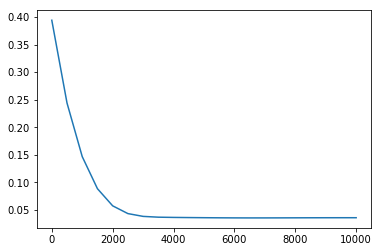

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(step_counts, losses, '-');